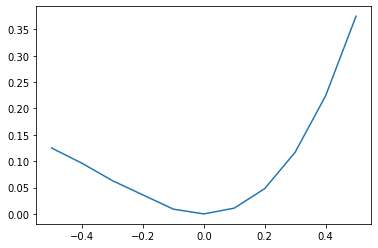

In [8]:
from matplotlib import pyplot 
def calculate(x):
    return x*x*x+x*x
inputs=[-0.5,-0.4,-0.3,-0.1,0.0,0.1,0.2,0.3,0.4,0.5]
outputs=[calculate(x) for x in inputs]
pyplot.plot(inputs,outputs)
pyplot.show()

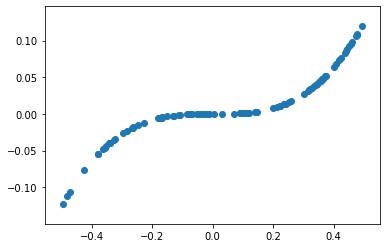

In [9]:
#generating random samples from X^3
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot
#generate random sample from X^3
def generate_samples(n=100):
    X1=rand(n)-0.5
    #generate output X^3(quadratic)
    X2=X1*X1*X1
    X1=X1.reshape(n,1)
    X2=X2.reshape(n,1)
    return hstack((X1,X2))
#generate samples
data=generate_samples()
#plot samples
pyplot.scatter(data[:,0],data[:,1])
pyplot.show()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


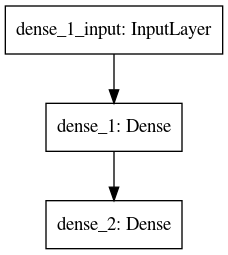

In [10]:
#define the discriminator model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import pydot
#define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model=Sequential()
    model.add(Dense(25,activation='relu',kernel_initializer='he_uniform',input_dim=n_inputs))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
#define the discriminator model
model=define_discriminator()
#summarize the model
model.summary()
#plot the model
plot_model(model,to_file='discriminator_plot.png',show_layer_names=True)

In [29]:
#define the discriminator model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy.random import rand
from numpy.random import randn

#define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model=Sequential()
    model.add(Dense(25,activation='relu',kernel_initializer='he_uniform',input_dim=n_inputs))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
#generate n real samples with class labels
def generate_real_samples(n):
    #generate inputs in [-0.5,0.5]
    X1=rand(n)-0.5
    #generate output X^3
    X2=X1*X1*X1
    #stack arrays
    X1=X1.reshape(n,1)
    X2=X2.reshape(n,1)
    X=hstack((X1,X2))
    #generate class labels
    y=ones((n,1))
    return X,y
#generate n fake samples with class labels
def generate_fake_samples(n):
    #generate inputs in[-1,1]
    X1=-1+rand(n)*2
    #generate outputs in [-1,1]
    X2=-1+rand(n)*2
    #stack arrays
    X1=X1.reshape(n,1)
    X2=X2.reshape(n,1)
    X=hstack((X1,X2))
    #generate class models
    y=zeros((n,1))
    return X,y
#train the discriminator model
def train_discriminator(model,n_epochs=1000,n_batch=128):
    half_batch=int(n_batch/2)
    #run epochs manually
    for i in range(n_epochs):
        #generate real examples
        X_real,y_real=generate_real_samples(half_batch)
        #update model
        model.train_on_batch(X_real,y_real)
        #generate fake examples
        X_fake,y_fake=generate_fake_samples(half_batch)
        #update model
        model.train_on_batch(X_fake,y_fake)
        #evaluate the model
        _,acc_real=model.evaluate(X_real,y_real,verbose=0)
        _,acc_fake=model.evaluate(X_fake,y_fake,verbose=0)
        print(i,acc_real,acc_fake)
#define the discriminator model
model=define_discriminator()
#fit the model
train_discriminator(model)


0 1.0 0.25
1 1.0 0.21875
2 1.0 0.28125
3 1.0 0.3125
4 1.0 0.203125
5 1.0 0.1875
6 1.0 0.25
7 1.0 0.15625
8 0.984375 0.265625
9 1.0 0.265625
10 0.984375 0.296875
11 0.984375 0.203125
12 1.0 0.3125
13 0.984375 0.296875
14 0.953125 0.25
15 0.96875 0.1875
16 0.9375 0.296875
17 0.953125 0.390625
18 1.0 0.3125
19 0.96875 0.25
20 0.953125 0.4375
21 0.953125 0.21875
22 1.0 0.28125
23 1.0 0.34375
24 0.921875 0.328125
25 0.9375 0.265625
26 0.953125 0.28125
27 0.921875 0.25
28 0.96875 0.375
29 0.921875 0.421875
30 0.921875 0.28125
31 0.9375 0.296875
32 0.90625 0.296875
33 0.90625 0.328125
34 0.875 0.375
35 0.953125 0.3125
36 0.859375 0.34375
37 0.84375 0.328125
38 0.859375 0.34375
39 0.859375 0.390625
40 0.84375 0.390625
41 0.953125 0.359375
42 0.828125 0.484375
43 0.890625 0.375
44 0.796875 0.328125
45 0.90625 0.40625
46 0.78125 0.296875
47 0.84375 0.375
48 0.875 0.359375
49 0.828125 0.328125
50 0.8125 0.359375
51 0.75 0.359375
52 0.8125 0.375
53 0.859375 0.359375
54 0.796875 0.421875
55 0.8125 

441 1.0 0.90625
442 1.0 0.921875
443 1.0 0.9375
444 1.0 0.9375
445 1.0 0.890625
446 1.0 0.859375
447 1.0 0.90625
448 1.0 0.90625
449 1.0 0.984375
450 1.0 0.90625
451 1.0 0.859375
452 1.0 0.984375
453 1.0 0.9375
454 1.0 0.890625
455 1.0 0.90625
456 1.0 0.859375
457 1.0 0.875
458 1.0 0.9375
459 1.0 0.875
460 1.0 0.921875
461 1.0 0.875
462 1.0 0.875
463 1.0 0.875
464 1.0 0.953125
465 1.0 0.9375
466 1.0 0.921875
467 1.0 0.9375
468 1.0 0.84375
469 1.0 0.90625
470 1.0 0.921875
471 1.0 0.953125
472 1.0 0.875
473 1.0 0.96875
474 1.0 0.96875
475 1.0 0.9375
476 1.0 0.90625
477 1.0 0.859375
478 1.0 0.90625
479 1.0 0.9375
480 1.0 0.90625
481 1.0 0.984375
482 1.0 0.90625
483 1.0 0.9375
484 1.0 0.9375
485 1.0 0.921875
486 1.0 0.96875
487 1.0 0.890625
488 1.0 0.890625
489 1.0 0.828125
490 1.0 0.90625
491 1.0 0.890625
492 1.0 0.953125
493 1.0 0.9375
494 1.0 0.90625
495 1.0 0.9375
496 1.0 0.890625
497 1.0 0.921875
498 1.0 0.875
499 1.0 0.9375
500 1.0 0.890625
501 1.0 0.859375
502 1.0 0.890625
503 1.0 0

955 1.0 0.890625
956 1.0 0.828125
957 1.0 0.859375
958 1.0 0.796875
959 1.0 0.84375
960 1.0 0.890625
961 1.0 0.875
962 1.0 0.875
963 1.0 0.890625
964 1.0 0.859375
965 1.0 0.8125
966 1.0 0.90625
967 1.0 0.859375
968 1.0 0.875
969 1.0 0.84375
970 1.0 0.828125
971 1.0 0.828125
972 1.0 0.859375
973 1.0 0.859375
974 1.0 0.84375
975 1.0 0.9375
976 1.0 0.890625
977 1.0 0.84375
978 1.0 0.9375
979 1.0 0.9375
980 1.0 0.78125
981 1.0 0.921875
982 1.0 0.890625
983 1.0 0.875
984 1.0 0.828125
985 1.0 0.875
986 1.0 0.953125
987 1.0 0.796875
988 1.0 0.890625
989 1.0 0.8125
990 1.0 0.90625
991 1.0 0.859375
992 1.0 0.78125
993 1.0 0.828125
994 1.0 0.828125
995 1.0 0.84375
996 1.0 0.953125
997 1.0 0.921875
998 1.0 0.890625
999 1.0 0.875


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


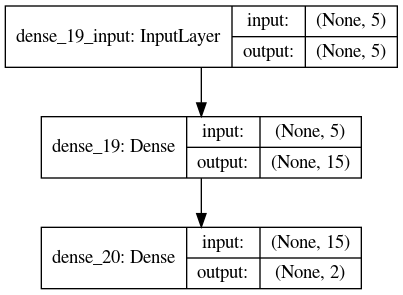

In [31]:
from keras.utils.vis_utils import plot_model

def define_generator(latent_dim,n_outputs=2):
    model=Sequential()
    model.add(Dense(15,activation='relu',kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs,activation='linear'))
    return model
#define the discriminator model
model=define_generator(5)
#summarize the model
model.summary()
#plot the model
plot_model(model,to_file='generator_plot.png',show_shapes=True,show_layer_names=True)


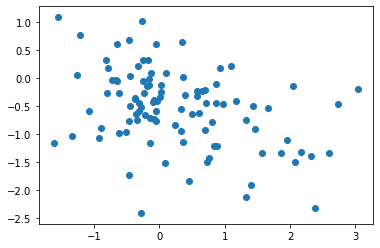

In [34]:
def define_generator(latent_dim,n_outputs=2):
    model=Sequential()
    model.add(Dense(15,activation='relu',kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs,activation='linear'))
    return model
def generate_latent_points(latent_dim,n):
    #generate points in the latent space
    x_input=randn(latent_dim*n)
    #reshape into a batch of inputs for the network
    x_input=x_input.reshape(n,latent_dim)
    return x_input
#use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator,latent_dim,n):
    #generate points in latent space
    x_input=generate_latent_points(latent_dim,n)
    #predict outputs
    X=generator.predict(x_input)
    #plot the results
    pyplot.scatter(X[:,0],X[:,1])
    pyplot.show()
#size of the latent space
latent_dim=5
#define the discriminator model
model=define_generator(latent_dim)
#generate and plot generated samples
generate_fake_samples(model,latent_dim,100)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_21 (Sequential)   (None, 2)                 122       
_________________________________________________________________
sequential_20 (Sequential)   (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


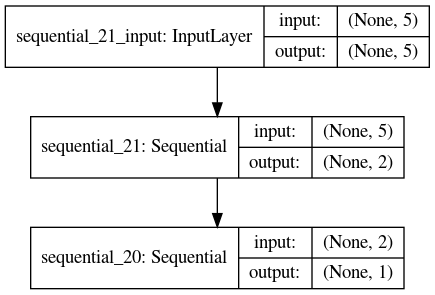

In [45]:
#define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model=Sequential()
    model.add(Dense(25,activation='relu',kernel_initializer='he_uniform',input_dim=n_inputs))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
#define the standalone generator model
def define_generator(latent_dim,n_outputs=2):
    model=Sequential()
    model.add(Dense(15,activation='relu',kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs,activation='linear'))
    return model
#define the combined generator and discriminator,for updating generator
def define_gan(generator,discriminator):
    #make weights in the discriminator not trainable
    discriminator.trainable=False

    #connect them
    model=Sequential()
    #add generator
    model.add(generator)
    #add discriminator
    model.add(discriminator)
    #compile model
    model.compile(loss='binary_crossentropy',optimizer='adam')
    return model
latent_dim=5
#create the discriminator
discriminator=define_discriminator()
#create the generator
generator=define_generator(latent_dim)
#create the gan
gan_model=define_gan(generator,discriminator)
#summarize gan model
gan_model.summary()
#plot gan model
plot_model(gan_model,to_file='gan_plot.png',show_shapes=True,show_layer_names=True)

/home/sastri/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1999 0.4000000059604645 1.0


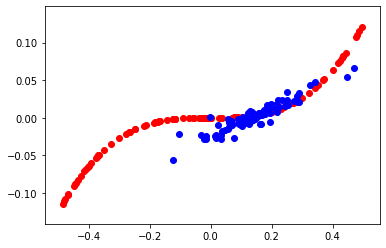

3999 0.0 1.0


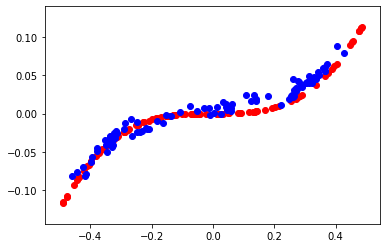

5999 0.30000001192092896 0.8500000238418579


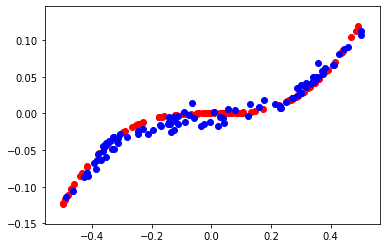

7999 0.47999998927116394 0.7400000095367432


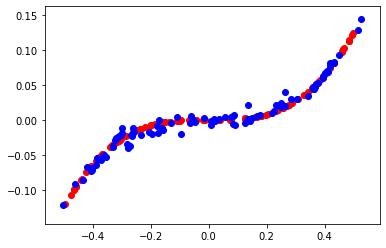

9999 0.7900000214576721 0.5299999713897705


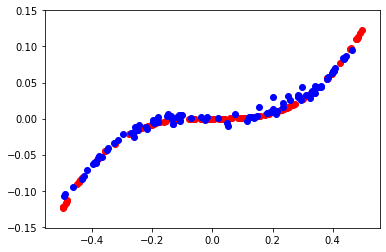

In [48]:
#define the standalone discriminator model
%matplotlib inline
from keras.models import Sequential
def define_discriminator(n_inputs=2):
    model=Sequential()
    model.add(Dense(25,activation='relu',kernel_initializer='he_uniform',input_dim=n_inputs))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
#define the standalone generator model
def define_generator(latent_dim,n_outputs=2):
    model=Sequential()
    model.add(Dense(15,activation='relu',kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs,activation='linear'))
    return model
#define the combined generator and discriminator model,for updating the generator
def define_gan(generator,discriminator):
    #make weights in the discriminators not trainable
    discriminator.trainable=False
    #connect them
    model=Sequential()
    #add generator
    model.add(generator)
    #add the discriminator
    model.add(discriminator)
    #compile model
    model.compile(loss='binary_crossentropy',optimizer='adam')
    return model
#generate n real samples with class labels
def generate_real_samples(n):
    #generate  inputs in[-0.5,0.5]
    X1=rand(n)-0.5
    #generate outputs X^3
    X2=X1*X1*X1
    #stack arrays
    X1=X1.reshape(n,1)
    X2=X2.reshape(n,1)
    X=hstack((X1,X2))
    #generate class labels
    y=ones((n,1))
    return X,y
#generate points in latent space as input for the generator
def generate_latent_points(latent_dim,n):
    #generate points in the latent space
    x_input=randn(latent_dim*n)
    #reshape into batch of inputs for the network
    x_input=x_input.reshape(n,latent_dim)
    return x_input
#use the generator to generate n fake examples,with class labels
def generate_fake_samples(generator,latent_dim,n):
    #generate points in latent space
    x_input=generate_latent_points(latent_dim,n)
    #predict outputs 
    X=generator.predict(x_input)
    #create class labels
    y=zeros((n,1))
    return X,y
#evluate the discriminator and plot real and fake points
def summarize_performance(epoch,generator,discriminator,latent_dim,n=100):
    #prepare real samples
    x_real,y_real=generate_real_samples(n)
    #evaluate discriminator on real examples
    _,acc_real=discriminator.evaluate(x_real,y_real,verbose=0)
    #prepare fake examples
    x_fake,y_fake=generate_fake_samples(generator,latent_dim,n)
    #evaluate discriminator on fake examples
    _,acc_fake=discriminator.evaluate(x_fake,y_fake,verbose=0)
    #summarize discriminator performance
    print(epoch,acc_real,acc_fake)
    #scatter plot real and fake data points
    pyplot.scatter(x_real[:,0],x_real[:,1],color='red')
    pyplot.scatter(x_fake[:,0],x_fake[:,1],color='blue')
    pyplot.show()
#train the generator and discriminator
def train(g_model,d_model,gan_model,latent_dim,n_epochs=10000,n_batch=128,n_eval=2000):
    #determine half the size of one batch,for updating the discriminator
    half_batch=int(n_batch/2)
    #manually enumerate epochs
    for i in range(n_epochs):
        #prepare real samples
        x_real,y_real=generate_real_samples(half_batch)
        #prepare fake examples
        x_fake,y_fake=generate_fake_samples(g_model,latent_dim,half_batch)
        #update discriminator
        d_model.train_on_batch(x_real,y_real)
        d_model.train_on_batch(x_fake,y_fake)
        #prepare points in latent space as input for the generator
        x_gan=generate_latent_points(latent_dim,n_batch)
        #create inverted labels for the fake samples
        y_gan=ones((n_batch,1))
        #update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan,y_gan)
        #evaluate the model every n_eval epochs
        if(i+1)% n_eval==0:
            summarize_performance(i,g_model,d_model,latent_dim)
#size of the latent space
latent_dim=5
#create the discriminator
discriminator=define_discriminator()
#create the generator
generator=define_generator(latent_dim)
#create the gan
gan_model=define_gan(generator,discriminator)
#train model
train(generator,discriminator,gan_model,latent_dim)
    